# Part IA Computing: Michaelmas Term
## Exercises 10.1, 10.2 and 10.3

Edwin Bahrami Balani ([`eb677`](mailto:eb677@cam.ac.uk))

> ## Exercise 10.1 (search)
> 
> We want to find a find the largest and smallest values in a long list of numbers. Implement
> two algorithms, based on:
> 
> 1. Iterating over the list entries; and 
> 1. First applying a built-in sort operation to the list.
> 
> Encapsulate each algorithm in a function, e.g.
> ```python
def min_max(x);
    # Implement your algorithm here
    return x_min, xmax
```    

> To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

In [57]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 10.1
import numpy as np

def min_max(x):
    x_min = x_max = x[0]
    for i in x:
        if i < x_min:
            x_min = i
        if i > x_max:
            x_max = i
    return x_min, x_max

def min_max_sort(x):
    x.sort()
    return x[0], x[len(x)-1]

for i in range(5):
    x = np.random.rand(1000)
    print(min(x), max(x))
    print(*min_max(x))
    print(*min_max_sort(x))
    print()

0.00628611719732 0.999041237507
0.00628611719732 0.999041237507
0.00628611719732 0.999041237507

0.0017820825391 0.997873576824
0.0017820825391 0.997873576824
0.0017820825391 0.997873576824

0.00121416841109 0.998751181877
0.00121416841109 0.998751181877
0.00121416841109 0.998751181877

0.000189114877942 0.999995568984
0.000189114877942 0.999995568984
0.000189114877942 0.999995568984

6.29702216302e-05 0.999187910089
6.29702216302e-05 0.999187910089
6.29702216302e-05 0.999187910089



> ## Exercise 10.2 (Newton's method for root finding)
> 
> Newton's method can be used to find a root $x$ of a function $f(x)$ such that
> 
> $$
f(x) = 0
$$

> A Taylor series expansion of $f$ about $x_{i}$ reads:

> $$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$
> 
> 
> If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
> 
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}

> In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

> Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here    
    return x1  # return root
```
> where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number of iterations, and:
> ```python
def f(x):
    # Evaluate function at x and return value
def df(x):
    # Evaluate df/dx at x and return value

> ```

> Your implementation should raise an exception if the maximum number of iterations (`max_it`)
> is exceeded.

> Use your program to find the roots of:
>     
> $$
f(x) = \tan(x) - 2x
$$

> between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ and on the same graph, 
> and show the roots computed by Newton's method.
> 
> Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, showing $x$ and $f$ at each iteration.


> ### Extension (optional)
> 
> For a complicated function we might not know how to compute the derivative, or it may be very complicated
> to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
> $(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

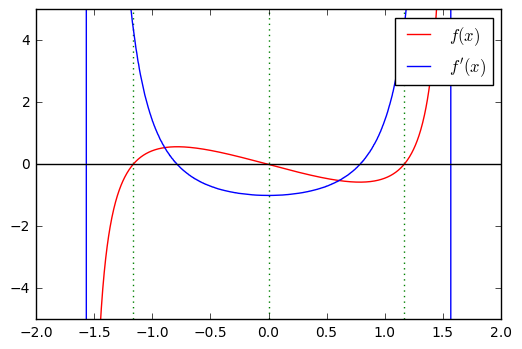

In [171]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 10.2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def newton(f, df, x0, tol, max_it):
    x1 = x0
    i = 0
    while abs(f(x1)) > tol:
        i += 1
        if i > max_it:
            raise RuntimeError("Iterations exceeded maximum of "+str(max_it))
        x1 = -f(x1)/df(x1) + x1
    return x1

f = lambda x: np.tan(x) - 2*x
df = lambda x: 1/(np.cos(x)**2) - 2

def num_diff(f, x, dx = 1e-14):
    return (f(x+dx) - f(x-dx)) / (2*dx)

x = np.linspace(-np.pi/2, np.pi/2, 1000)
yf = f(x)
ydf = num_diff(f, x)
plt.clf() # clear figure
plt.hold(True)

rooty = (-5, 5)
roots = []
for guess in (-1.2, 0.5, 1.2):
    root = newton(f, df, guess, 1e-6, 10000)
    plt.plot((root, root), rooty, 'g', ls=':')
plt.plot(x, yf, 'r', label='$f(x)$')
plt.plot(x, ydf, 'b', label="$f'(x)$")

plt.plot((-2, 2), (0, 0), 'k') #origin line
plt.xlim(-2, 2)
plt.ylim(-5, 5)
plt.legend()

> ## Exercise 10.3 (optional, low pass image filter)
> 
> Images files can be loaded and displayed with Matplotlib. An imported image is stored as a 
> three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
> where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
> and the third axis is for the colour component (RGB: red, green and blue) intensity. See http://matplotlib.org/users/image_tutorial.html for more background.
> 
> Below we fetch an image and display it:

<class 'numpy.ndarray'>
Image array shape: (375, 500, 3)


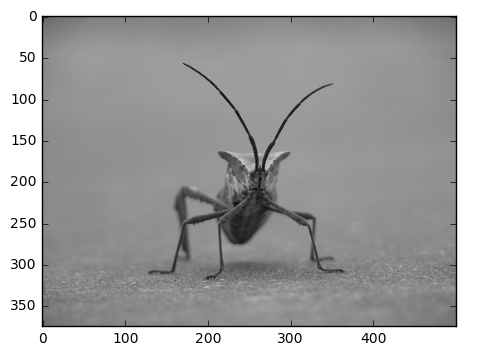

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import image
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png')

# Check type and shape
print(type(img))
print("Image array shape: {}".format(img.shape))

# Display image
plt.imshow(img);

> The task is to write a function that applies a particular low-pass filter algorithm to an image array and 
> returns the 
> filtered image. With this particular filter, the value of a pixel in the filtered image is equal to the average value
> of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, the neighbours are 
> `[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 
> 
> Run the filter algorithm multiple times on the above image to explore the effect of the filter.
> 
> *Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
> ```python
import numpy as np
B = np.zeros_like(A)
```

CPU times: user 4.72 s, sys: 0 ns, total: 4.72 s
Wall time: 4.71 s
CPU times: user 4.74 s, sys: 12 ms, total: 4.75 s
Wall time: 4.74 s


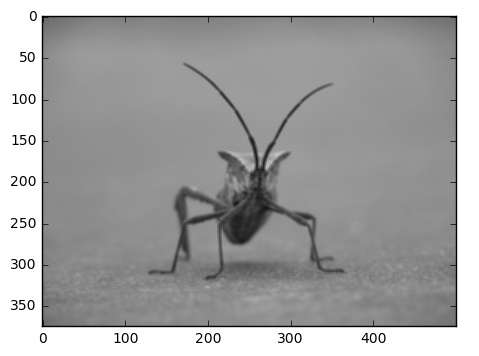

In [10]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 10.3
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import image
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png')
def lowpass(img):
    dims = np.shape(img)
    out = np.zeros_like(img)
    peek_coords = [(i,j) for i in (-1, 1) for j in (-1, 1)]
    for i in range(dims[0]):
        for j in range(dims[1]):
            out[i,j,:] = np.mean([img[
                        (i+x) % dims[0], (j+y) % dims[1], :
                    ] for x,y in peek_coords])
    return out


def lowpass_alt(img):
    dims = np.shape(img)
    out = np.zeros_like(img)
    peek_coords = [(i,j) for i in (-1, 1) for j in (-1, 1)]
    for i, j in np.ndindex(dims[:2]):
            out[i,j,:] = np.mean([img[(i+x) % dims[0], (j+y) % dims[1], :] for x,y in peek_coords])
    return out
%time plt.imshow(lowpass(img))
%time plt.imshow(lowpass_alt(img))